# M2 Assignment 
### By Eli Weiss

Link to the video portion of this assignment can be found here:
http://somup.com/cY1VeFjSes

#### Project Goal:
In this project we will try to predict how much electricity a power plant will produce. <br/>
This is important because knowing the amount of power that is necessary for<br/> warmer or more humid days will
allow the plant workers to prepare for increased <br/>demand and avoid outages.

#### Methodology:
We will first explore descriptive statistics of the dependent and<br/> independent variables. 
After the EDA section we will be employing linear <br/>regression as the predictive model and we will be using 
K-fold cross <br/>validation to lower sampling noise.

## Part I: Data Preparation

In [1]:
# load the pandas library
import pandas as pd

# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# "The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011)
#  when the power plant was set to work with full load. Features consist of hourly average ambient variables 
#  Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) 
#  to predict the net hourly electrical energy output (EP) of the plant."
# for more information on the data please visit https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

filename = "https://raw.githubusercontent.com/enwweiss/DAV-6150/master/M2_Data.csv"
df = pd.read_csv(filename)
df.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Part II: EDA

#### Check the size of the data

In [8]:
# how many observations are contained within the example data set?
len(df)

9568

#### Check for missing data 

In [21]:
# check for missing values in EP (Net hourly electrical energy output)
df['EP'].isnull().sum()

0

In [22]:
# check for missing values in T (Temperature) 
df['T'].isnull().sum()

0

In [23]:
# check for missing values in V (Exhaust Vacuum)
df['V'].isnull().sum()

0

In [24]:
# check for missing values in AP (Ambient Pressure)
df['AP'].isnull().sum()

0

In [25]:
# check for missing values in RH (Relative Humidity)
df['RH'].isnull().sum()

0

#### Statistical EDA 

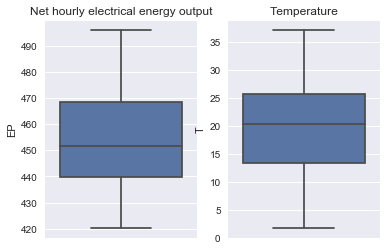

mean of EP is  454.365009406
mean of T is  19.6512311873


In [39]:
plt.figure(1)
plt.subplot(121)
sns.boxplot( y=df["EP"] );
plt.title('Net hourly electrical energy output')
plt.subplot(122)
sns.boxplot( y=df["T"] );
plt.title('Temperature')
plt.xlabel('')

plt.show()
import statistics as stats
print('mean of EP is ',stats.mean(df['EP']))
print('mean of T is ',stats.mean(df['T']))

the IQR for Net hourly electrical energy output is ~ 440-470
the IQR for Temperature is ~ 13-26<br/>
median value for Net hourly electrical energy output is ~ 454
median value for Temperature is ~ 20



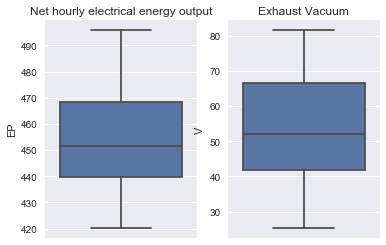

mean of V is  54.3058037207


In [40]:
plt.figure(1)
plt.subplot(121)
sns.boxplot( y=df["EP"] );
plt.title('Net hourly electrical energy output')
plt.subplot(122)
sns.boxplot( y=df["V"] );
plt.title('Exhaust Vacuum')
plt.xlabel('')

plt.show()
print('mean of V is ',stats.mean(df['V']))

the IQR for Net hourly electrical energy output is ~ 440-470
the IQR for Exhaust Vacuum is ~ 42-68<br/>
median value for Net hourly electrical energy output is ~ 454
median value for Exhaust Vacuum is ~ 54



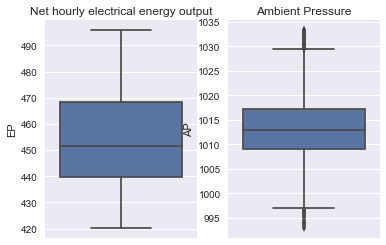

mean of AP is  1013.25907818


In [44]:
plt.figure(1)
plt.subplot(121)
sns.boxplot( y=df["EP"] );
plt.title('Net hourly electrical energy output')
plt.subplot(122)
sns.boxplot( y=df["AP"] );
plt.title('Ambient Pressure')
plt.xlabel('')

plt.show()
print('mean of AP is ',stats.mean(df['AP']))

the IQR for Net hourly electrical energy output is ~ 440-470
the IQR for Ambient Pressure is ~ 1009-1017<br/>
median value for Net hourly electrical energy output is ~ 454
median value for Ambient Pressure is ~ 1013<br/>
Note: there are outliers which may need to be removed or controlled for which may be affecting the mean for AP

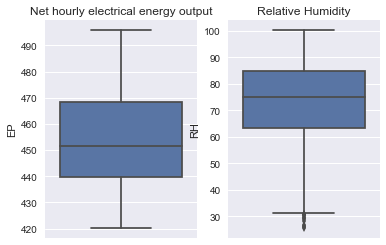

mean of Relative Humidity is  73.3089778428


In [46]:
plt.figure(1)
plt.subplot(121)
sns.boxplot( y=df["EP"] );
plt.title('Net hourly electrical energy output')
plt.subplot(122)
sns.boxplot( y=df["RH"] );
plt.title('Relative Humidity')
plt.xlabel('')

plt.show()
print('mean of Relative Humidity is ',stats.mean(df['RH']))

the IQR for Net hourly electrical energy output is ~ 440-470
the IQR for Ambient Pressure is ~ 65-85
<br/>median value for Net hourly electrical energy output is ~ 454
median value for Ambient Pressure is ~ 73<br/>
Note: there are outliers which may need to be removed or controlled for which may be affecting the mean for RH
Additionally RH looks  like it is not mormally distributed from this chart we will explore this later in our EDA.

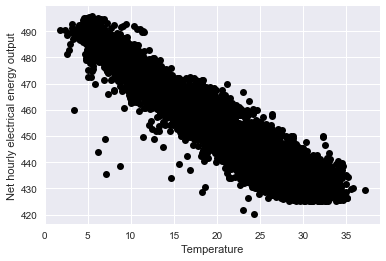

In [32]:
x = df['T']
y = df['EP']
plt.xlabel('Temperature')
plt.ylabel('Net hourly electrical energy output')


plt.plot(x, y, 'o', color='black');
plt.show()

Temperature has a high linear relationship with Net hourly electrical energy output<br/>
We expect that Net hourly electrical energy output will be have significance and highly predictive.

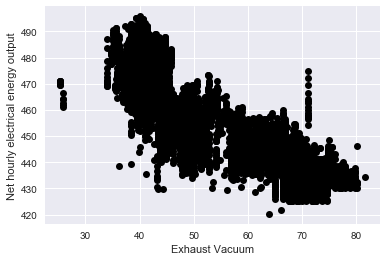

In [31]:
x = df['V']
y = df['EP']

plt.xlabel('Exhaust Vacuum')
plt.ylabel('Net hourly electrical energy output')

plt.plot(x, y, 'o', color='black');
plt.show()

Exhaust Vacuum has a somewhat linear relationship with Net hourly electrical energy output<br/>
We expect that Exhaust Vacuum will be have significance and be somewhat predictive.

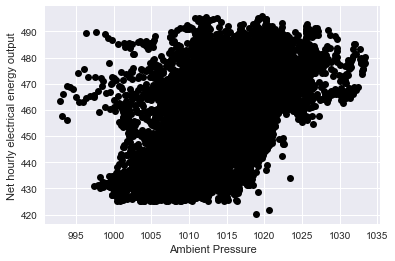

In [29]:
x = df['AP']
y = df['EP']

plt.xlabel('Ambient Pressure')
plt.ylabel('Net hourly electrical energy output')

plt.plot(x, y, 'o', color='black');
plt.show()

Ambient Pressure does not have a linear relationship with Net hourly electrical energy output<br/>
We expect that Ambient Pressure will be not be "significant" and will not be "predictive."<br/>
Even if this shows a pvalue that is significant it should not be included in the model<br/>
since the relationship between these two variables is not linear.<br/>
Any inferences learned from this predictor would be misleading. 

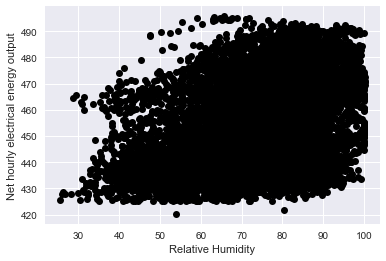

In [47]:
x = df['RH']
y = df['EP']

plt.xlabel('Relative Humidity')
plt.ylabel('Net hourly electrical energy output')

plt.plot(x, y, 'o', color='black');
plt.show()

Relative Humidity does not have a linear relationship with Net hourly electrical energy output<br/>
We expect that Relative Humidity will be "significant" and will be "predictive."<br/>
However, we should be concerned that this data shows a fan pattern as this repesents non-constant variance.<br/>
Even though this will show a pvalue that is significant it should not be included in the model<br/>
since the relationship between these two variables is not linear and it has non-constant variance.<br/>
Any inferences learned from this predictor would be misleading. 

## Part III: Statistical Learning

Now that we have explored our data we are ready to build predictive models.<br/>
We are going to build two models. The first model will include the predictors<br/>
RH and AP and should give the model higher "predictive" power. However this is <br/>
misleading, so we will fit another model without these two variables. It should receive <br/>
a lower score, but will be a more accurate at assesing the predictive power 
of the model. 
<br/>

We will also explore to see if RH and AP have significant p-values even though they<br/>
violate some of the underlying assumptions of linear regression.

#### Model 1: Full Model

First we will fit a model using all of the columns 

In [43]:
# move the response variable to a separate variable
y = df.EP

In [44]:
# make a copy of the dataframe
X = df.copy()

In [45]:
# now drop the EP column from 'X' so that the response variable is removed from the explanatory variables
X.drop('EP', axis=1, inplace=True)

In [46]:
# The EP column has been removed
X.head()

,T,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [47]:
# Now split the data into training and testing subsets. 
# We'll set aside 40% of the data for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

In [48]:
# Let's check the results
len(X_train)

5740

In [49]:
len(X_test)

3828

In [30]:
# Let's check the row indices of the new objects to see whether they match
y_test.head()

5925    456.57
4294    438.70
7120    436.09
6688    468.09
7322    443.66
Name: EP, dtype: float64

In [31]:
X_test.head()

,T,V,AP,RH
5925,19.60,48.14,1013.18,68.71
4294,21.28,70.32,1011.55,88.05
7120,28.62,59.14,1016.36,53.10
6688,11.02,40.00,1015.75,74.83
7322,23.02,63.47,1012.21,80.61


In [32]:
X_train.head()

,T,V,AP,RH
15,21.42,43.79,1015.76,43.08
2230,11.95,41.48,1013.44,74.83
4371,21.43,63.94,1012.68,99.68
5574,28.44,77.54,1011.73,77.30
7182,3.20,41.31,997.67,98.84


In [33]:
y_train.head()

15      462.19
2230    465.41
4371    445.29
5574    433.21
7182    489.86
Name: EP, dtype: float64

In [50]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# create a new dataframe containing all variables 
newX_train = X_train[['T', 'V','AP','RH']].copy()

# sanity check
newX_train.head()

,T,V,AP,RH
15,21.42,43.79,1015.76,43.08
2230,11.95,41.48,1013.44,74.83
4371,21.43,63.94,1012.68,99.68
5574,28.44,77.54,1011.73,77.30
7182,3.20,41.31,997.67,98.84


In [51]:
# Assing the model function you want to use to a variable
model = LinearRegression()

# fit the model using 5-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
# cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
# parameter
scores = cross_val_score(model, newX_train, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores)

[ 0.93236026  0.92274424  0.92499926  0.92963045  0.92322747]


In [36]:
import numpy as np

# calculate the average accuracy across all 5 folds
np.mean(scores)

0.92659233752791414

In [53]:
newX_train_lm = sm.add_constant(newX_train).copy()

#apply the model and fit it
lm1 = sm.OLS(y_train, newX_train_lm)
lm1_fit = lm1.fit()

#print the results
print(lm1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 1.815e+04
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        23:10:42   Log-Likelihood:                -16887.
No. Observations:                5740   AIC:                         3.378e+04
Df Residuals:                    5735   BIC:                         3.382e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        452.7295     12.731     35.562      0.0

We see that all of the values are significant and that the R2 is 92.7%
However we know that AP and RH are do not have a linear relationship 
in the underlying data. So they will need to be removed. We expect that the 
R2 will go down. 

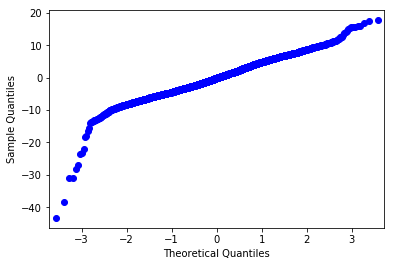

In [54]:
# test to see if the residuals are normally distributed
import pylab

resid = lm1_fit.resid
sm.qqplot(resid)
pylab.show()

We see that the residuals here are normally distributed.

#### Model 2: Partial Model


In [55]:
# create a new dataframe containing only the variables T and V
newX_train = X_train[['T', 'V']].copy()

# sanity check
newX_train.head()

,T,V
15,21.42,43.79
2230,11.95,41.48
4371,21.43,63.94
5574,28.44,77.54
7182,3.20,41.31


In [56]:
# Assing the model function you want to use to a variable
model = LinearRegression()

# fit the model using 5-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
# cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
# parameter
scores = cross_val_score(model, newX_train, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores)

[ 0.92066089  0.91044954  0.91192346  0.91570921  0.91252192]


In [57]:
# calculate the average accuracy across all 5 folds
np.mean(scores)

0.91425300403700616

In [58]:
newX_train_lm = sm.add_constant(newX_train).copy()

#apply the model and fit it
lm1 = sm.OLS(y_train, newX_train_lm)
lm1_fit = lm1.fit()

#print the results
print(lm1_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                 3.064e+04
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        23:11:07   Log-Likelihood:                -17336.
No. Observations:                5740   AIC:                         3.468e+04
Df Residuals:                    5737   BIC:                         3.470e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        505.3221      0.308   1639.398      0.0

We see that all of the values are significant and that the R2 is 91.4%
We see that the R2 of this model went down a little as we expected it would.

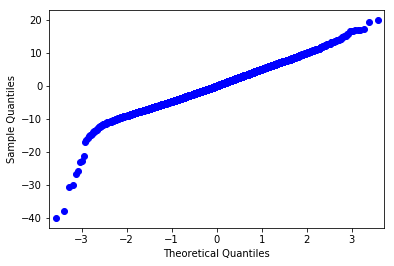

In [59]:
# test to see if the residuals are normally distributed
import pylab

resid = lm1_fit.resid
sm.qqplot(resid)
pylab.show()

We see that the residuals here are normally distributed.

## Conclusion

By removing features that violate the underlying assumptions of linear regression (i.e. they do not have a linear relationship)<br/>
we were able to achieve a model that is more normally distributed.